# **Question 1:Develop a neural network using PyTorch for BMI estimation.Given information about the user, such as their gender, height, and weight, your modelshould classify the user into one of the BMI indices. Refer to Kaggle for access to the dataset.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
df = pd.read_csv('bmi.csv')
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
X = df[['Gender', 'Height', 'Weight']].values
y = df['Index'].values

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Training set shape:")
print(f"X_train: {X_train.shape} (Dimensions: {X_train.ndim})")
print(f"y_train: {y_train.shape} (Dimensions: {y_train.ndim})")

print("\nTest set shape:")
print(f"X_test: {X_test.shape} (Dimensions: {X_test.ndim})")
print(f"y_test: {y_test.shape} (Dimensions: {y_test.ndim})")

Training set shape:
X_train: (350, 3) (Dimensions: 2)
y_train: (350,) (Dimensions: 1)

Test set shape:
X_test: (150, 3) (Dimensions: 2)
y_test: (150,) (Dimensions: 1)


In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.int64)
y_test_tensor = torch.tensor(y_test, dtype=torch.int64)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

Epoch 1: loss on final training batch: 1.6789
Epoch 2: loss on final training batch: 1.3853
Epoch 3: loss on final training batch: 1.1983
Epoch 4: loss on final training batch: 1.0369
Epoch 5: loss on final training batch: 0.9183
Epoch 6: loss on final training batch: 0.8321
Epoch 7: loss on final training batch: 0.7696
Epoch 8: loss on final training batch: 0.7160
Epoch 9: loss on final training batch: 0.6702
Epoch 10: loss on final training batch: 0.6316
Epoch 11: loss on final training batch: 0.5986
Epoch 12: loss on final training batch: 0.5708
Epoch 13: loss on final training batch: 0.5468
Epoch 14: loss on final training batch: 0.5251
Epoch 15: loss on final training batch: 0.5060
Epoch 16: loss on final training batch: 0.4887
Epoch 17: loss on final training batch: 0.4742
Epoch 18: loss on final training batch: 0.4607
Epoch 19: loss on final training batch: 0.4486
Epoch 20: loss on final training batch: 0.4379
Epoch 21: loss on final training batch: 0.4282
Epoch 22: loss on fina

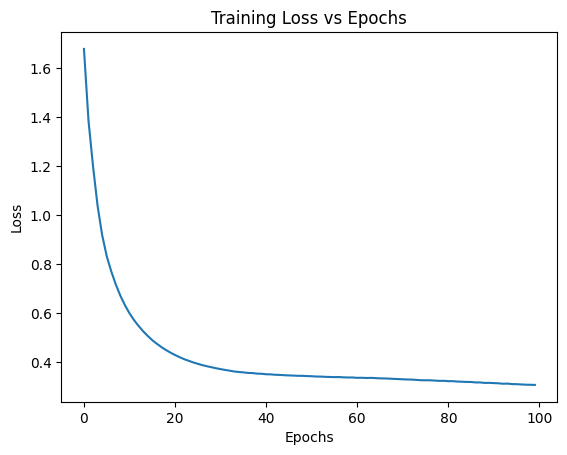

In [ ]:
torch.manual_seed(0)

# Define the neural network model
model = nn.Sequential(
    nn.Linear(3, 100),
    nn.ReLU(),
    nn.Linear(100, 50),
    nn.ReLU(),
    nn.Linear(50,6)
)


loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Training parameters
num_epochs = 100
batch_size = 32
losses = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    for i in range(0, len(X_train_tensor), batch_size):

        X_batch = X_train_tensor[i:i + batch_size]
        y_batch = y_train_tensor[i:i + batch_size]
        y_pred = model(X_batch)

        loss = loss_fn(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    losses.append(loss.item())
    print(f"Epoch {epoch + 1}: loss on final training batch: {loss.item():.4f}")

# Evaluate on the test set
y_test_pred = model(X_test_tensor)
y_test_pred_classes = torch.argmax(y_test_pred, axis=1)
test_loss = loss_fn(y_test_pred, y_test_tensor)
#print("Loss on test set: {:.4f}".format(test_loss.item()))
print("\nTest Set Performance:")
print(classification_report(y_test_tensor.numpy(), y_test_pred_classes.numpy(), zero_division=0))

# Plot the training loss
plt.plot(losses)
plt.title("Training Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


Training with learning rate: 0.1, batch size: 8
Loss on test set: 0.8963
Test Accuracy: 0.6267

Training with learning rate: 0.1, batch size: 16
Loss on test set: 0.3833
Test Accuracy: 0.8800

Training with learning rate: 0.1, batch size: 32
Loss on test set: 0.2951
Test Accuracy: 0.9333

Training with learning rate: 0.1, batch size: 64
Loss on test set: 0.2692
Test Accuracy: 0.8933

Training with learning rate: 0.01, batch size: 8
Loss on test set: 0.2910
Test Accuracy: 0.9067

Training with learning rate: 0.01, batch size: 16
Loss on test set: 0.2911
Test Accuracy: 0.9067

Training with learning rate: 0.01, batch size: 32
Loss on test set: 0.2915
Test Accuracy: 0.9133

Training with learning rate: 0.01, batch size: 64
Loss on test set: 0.3720
Test Accuracy: 0.8667

Training with learning rate: 0.001, batch size: 8
Loss on test set: 0.4117
Test Accuracy: 0.8467

Training with learning rate: 0.001, batch size: 16
Loss on test set: 0.5729
Test Accuracy: 0.8400

Training with learning r

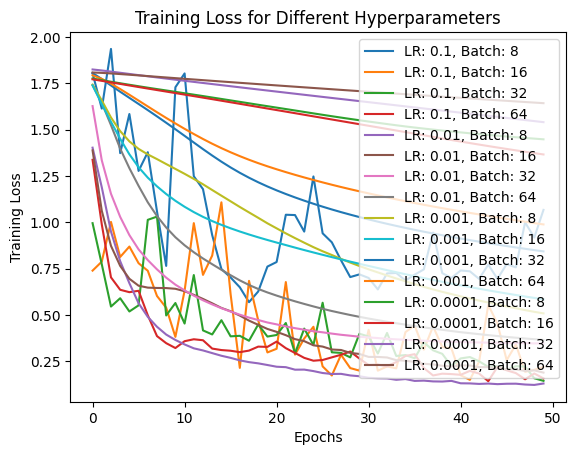

In [ ]:
# Set seed for reproducibility
torch.manual_seed(0)

# Hyperparameters for fine-tuning
learning_rates = [0.1, 0.01, 0.001, 0.0001]
batch_sizes = [8, 16, 32, 64]
num_epochs = 50
results = {}

def create_model():
    model = nn.Sequential(
        nn.Linear(3, 100),
        nn.ReLU(),
        nn.Linear(100, 50),
        nn.ReLU(),
        nn.Linear(50, 6)
    )
    return model

# Train model
def train_model(model, optimizer, loss_fn, num_epochs, batch_size, X_train_tensor, y_train_tensor):
    losses = []

    for epoch in range(num_epochs):
        for i in range(0, len(X_train_tensor), batch_size):
            X_batch = X_train_tensor[i:i + batch_size]
            y_batch = y_train_tensor[i:i + batch_size]
            y_pred = model(X_batch)

            loss = loss_fn(y_pred, y_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        losses.append(loss.item())

    return losses

# Evaluate the model
def evaluate_model(model, loss_fn, X_test_tensor, y_test_tensor):
        y_test_pred = model(X_test_tensor)
        y_test_pred_classes = torch.argmax(y_test_pred, axis=1)
        test_loss = loss_fn(y_test_pred, y_test_tensor)
        print("Loss on test set: {:.4f}".format(test_loss.item()))

        # Calculate accuracy
        accuracy = accuracy_score(y_test_tensor.numpy(), y_test_pred_classes.numpy())
        print(f"Test Accuracy: {accuracy:.4f}")  # Print test accuracy

        return y_test_pred_classes

for lr in learning_rates:
    for batch_size in batch_sizes:
        print(f"\nTraining with learning rate: {lr}, batch size: {batch_size}")

        model = create_model()
        loss_fn = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

        losses = train_model(model, optimizer, loss_fn, num_epochs, batch_size, X_train_tensor, y_train_tensor)
        y_test_pred_classes = evaluate_model(model, loss_fn, X_test_tensor, y_test_tensor)

        results[(lr, batch_size)] = {
            'losses': losses,
            'y_test_pred_classes': y_test_pred_classes
        }

# Plot training losses
for (lr, batch_size), result in results.items():
    plt.plot(result['losses'], label=f"LR: {lr}, Batch: {batch_size}")

plt.title("Training Loss for Different Hyperparameters")
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.legend()
plt.show()


# **Question 2 Develop a neural network using PyTorch for Concrete Strength estimation.Given information about the concrete, such as the amount of cement, water,superplasticizer, etc, your model should estimate the strength of the concrete.Refer to Kaggle for access to the dataset.**



In [ ]:
data = pd.read_csv('concrete.csv')
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
X = data.drop('Strength', axis=1).values
y = data['Strength'].values

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

X_tensor = torch.tensor(X_standardized, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Set random seed for reproducibility
torch.manual_seed(0)

# Split the dataset into train (70%) and test (30%) using PyTorch
def split_data(X, y, train_ratio=0.7):
    num_samples = X.size(0)
    num_train = int(num_samples * train_ratio)

    # Shuffle indices
    indices = torch.randperm(num_samples)
    train_indices = indices[:num_train]
    test_indices = indices[num_train:]

    return X[train_indices], y[train_indices], X[test_indices], y[test_indices]

# Split the data
X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor = split_data(X_tensor, y_tensor)

print("Training set shape:")
print(f"X_train: {X_train_tensor.shape} (Dimensions: {X_train_tensor.ndim})")
print(f"y_train: {y_train_tensor.shape} (Dimensions: {y_train_tensor.ndim})")

print("\nTest set shape:")
print(f"X_test: {X_test_tensor.shape} (Dimensions: {X_test_tensor.ndim})")
print(f"y_test: {y_test_tensor.shape} (Dimensions: {y_test_tensor.ndim})")

# Create DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)





Training set shape:
X_train: torch.Size([721, 8]) (Dimensions: 2)
y_train: torch.Size([721, 1]) (Dimensions: 2)

Test set shape:
X_test: torch.Size([309, 8]) (Dimensions: 2)
y_test: torch.Size([309, 1]) (Dimensions: 2)


Epoch [10/100], Loss: 156.4801
Epoch [20/100], Loss: 117.3853
Epoch [30/100], Loss: 100.4040
Epoch [40/100], Loss: 90.2560
Epoch [50/100], Loss: 80.0187
Epoch [60/100], Loss: 71.9928
Epoch [70/100], Loss: 64.8122
Epoch [80/100], Loss: 54.9363
Epoch [90/100], Loss: 46.2532
Epoch [100/100], Loss: 38.3753
Mean Squared Error (MSE) on test set: 43.2201
Mean Absolute Error (MAE) on test set: 5.0353


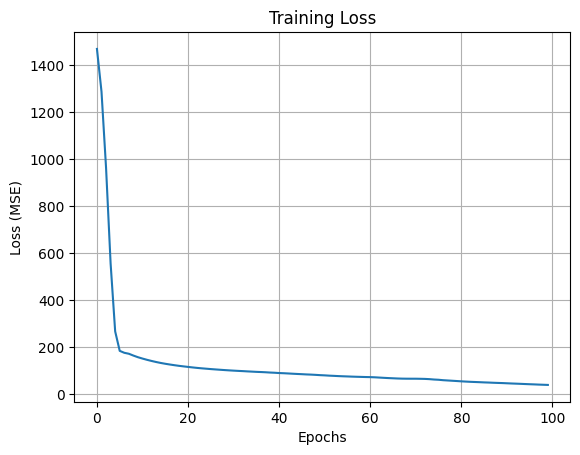

In [ ]:
model = nn.Sequential(
    nn.Linear(8, 100),
    nn.ReLU(),
    nn.Linear(100, 50),
    nn.ReLU(),
    nn.Linear(50,1)
)

# loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training parameters
num_epochs = 100
batch_size = 32
losses = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    for i in range(0, len(X_train_tensor), batch_size):
        X_batch = X_train_tensor[i:i + batch_size]
        y_batch = y_train_tensor[i:i + batch_size]


        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)


        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    losses.append(loss.item())
    if (epoch + 1) % 10 == 0:  # Print every 10 epochs
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")


#Evaluate
y_test_pred = model(X_test_tensor)

# Calculate MSE and MAE
mse = torch.mean((y_test_pred - y_test_tensor) ** 2).item()
mae = torch.mean(torch.abs(y_test_pred - y_test_tensor)).item()

print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")
print(f"Mean Absolute Error (MAE) on test set: {mae:.4f}")

# Plot the training loss
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.grid()
plt.show()

Training with Learning Rate: 0.1, Batch Size: 8
Training with Learning Rate: 0.1, Batch Size: 16
Training with Learning Rate: 0.1, Batch Size: 32
Training with Learning Rate: 0.1, Batch Size: 64
Training with Learning Rate: 0.01, Batch Size: 8
Training with Learning Rate: 0.01, Batch Size: 16
Training with Learning Rate: 0.01, Batch Size: 32
Training with Learning Rate: 0.01, Batch Size: 64
Training with Learning Rate: 0.001, Batch Size: 8
Training with Learning Rate: 0.001, Batch Size: 16
Training with Learning Rate: 0.001, Batch Size: 32
Training with Learning Rate: 0.001, Batch Size: 64
Training with Learning Rate: 0.0001, Batch Size: 8
Training with Learning Rate: 0.0001, Batch Size: 16
Training with Learning Rate: 0.0001, Batch Size: 32
Training with Learning Rate: 0.0001, Batch Size: 64
Learning Rate: 0.1, Batch Size: 8, MSE: 34.2708, MAE: 4.4532
Learning Rate: 0.1, Batch Size: 16, MSE: 49.4074, MAE: 5.2521
Learning Rate: 0.1, Batch Size: 32, MSE: 35.7284, MAE: 4.5133
Learning Ra

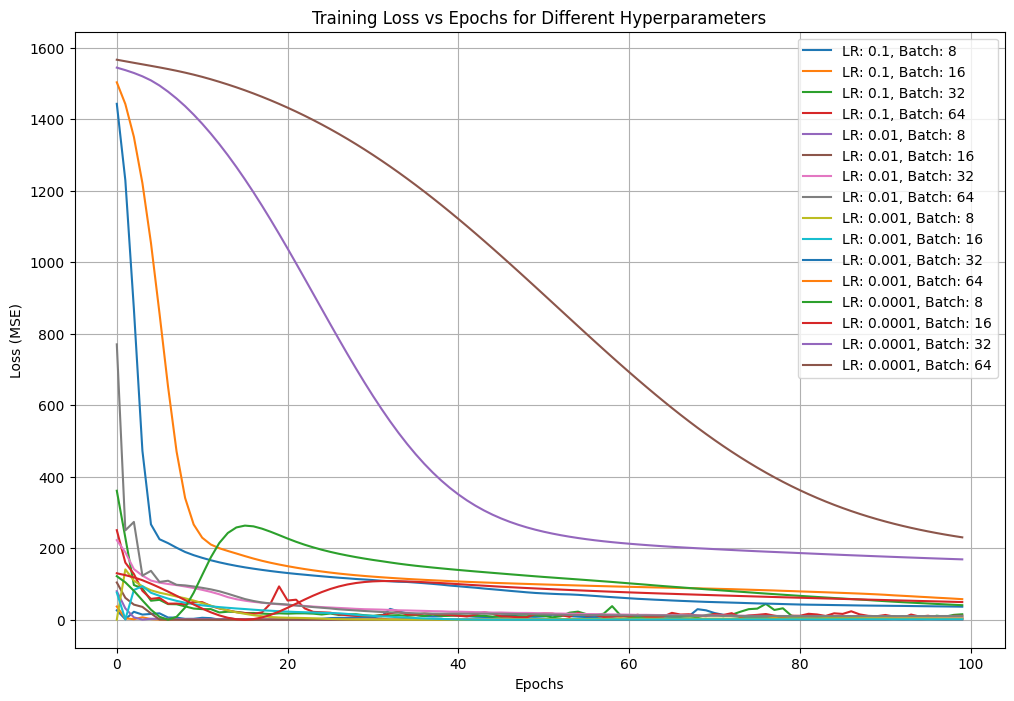

In [ ]:
# Define the neural network model
def create_model():
    model = nn.Sequential(
        nn.Linear(8, 100),  # Input layer with 8 features
        nn.ReLU(),
        nn.Linear(100, 50),
        nn.ReLU(),
        nn.Linear(50, 1)  # Output layer for regression
    )
    return model

# Function to train the model and evaluate performance
def train_and_evaluate(lr, batch_size, num_epochs=100):
    model = create_model()
    loss_fn = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    losses = []

    # Training loop
    for epoch in range(num_epochs):

        for i in range(0, len(X_train_tensor), batch_size):
            X_batch = X_train_tensor[i:i + batch_size]
            y_batch = y_train_tensor[i:i + batch_size]

            # Forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        losses.append(loss.item())

    # Evaluate on the test set

    y_test_pred = model(X_test_tensor)

    mse = torch.mean((y_test_pred - y_test_tensor) ** 2).item()
    mae = torch.mean(torch.abs(y_test_pred - y_test_tensor)).item()

    return losses, mse, mae

# Hyperparameter grid
learning_rates = [0.1, 0.01, 0.001, 0.0001]
batch_sizes = [8, 16, 32, 64]
results = {}

for lr in learning_rates:
    for batch_size in batch_sizes:
        print(f"Training with Learning Rate: {lr}, Batch Size: {batch_size}")
        losses, mse, mae = train_and_evaluate(lr, batch_size)
        results[(lr, batch_size)] = {
            'losses': losses,
            'mse': mse,
            'mae': mae
        }


# Test Performance
for (lr, batch_size), result in results.items():
    print(f"Learning Rate: {lr}, Batch Size: {batch_size}, MSE: {result['mse']:.4f}, MAE: {result['mae']:.4f}")

# Results
plt.figure(figsize=(12, 8))
for (lr, batch_size), result in results.items():
    plt.plot(result['losses'], label=f"LR: {lr}, Batch: {batch_size}")

plt.title("Training Loss  for Different Hyperparameters")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid()
plt.show()



# **Question 3: Design and implement a CNN to be used in a task of Medical Image Classification.Given an image of an MRI/CT/X-ray scan, your model is to predict the body part being scanned. Some sample images are shown in the figure below.You should use and download the dataset from Kaggle, which you can reduce to 1000 data points per class.**

In [ ]:
!pip install torch torchvision scikit-learn matplotlib

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving archive (5).zip to archive (5).zip


In [ ]:
import zipfile
import os

# Replace 'your_dataset.zip' with the name of your uploaded zip file
zip_file_path = 'Medical.zip'
output_folder = '/content/medical'  # Specify the destination for unzipped files

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(output_folder)

# Check the extracted files
os.listdir(output_folder)

['HeadCT', 'ChestCT', 'Hand', 'CXR', 'BreastMRI', 'AbdomenCT']

In [ ]:
import random

class_folders = os.listdir(output_folder)

for class_folder in class_folders:
    class_path = os.path.join(output_folder, class_folder)

    if os.path.isdir(class_path):
        images = os.listdir(class_path)


        if len(images) > 1000:
            images_to_delete = random.sample(images, len(images) - 1000)

            for image in images_to_delete:
                os.remove(os.path.join(class_path, image))

        print(f"Reduced {class_folder} to {len(os.listdir(class_path))} images.")

Reduced HeadCT to 1000 images.
Reduced ChestCT to 1000 images.
Reduced Hand to 1000 images.
Reduced CXR to 1000 images.
Reduced BreastMRI to 1000 images.
Reduced AbdomenCT to 1000 images.


In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

#Transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images to 128x128 for consistency
    transforms.ToTensor(),
])

# Load the dataset
dataset = datasets.ImageFolder(output_folder, transform)
train_set, test_set = torch.utils.data.random_split(dataset, [int(0.7 * len(dataset)), int(0.3 * len(dataset))])
train_loader = DataLoader(train_set, shuffle=True, batch_size=16)
test_loader = DataLoader(test_set, batch_size=16)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


torch.manual_seed(0)


model = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(16, 32, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(32, 64, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(64 * 16 * 16, len(dataset.classes)),
)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
train_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}')


Epoch [1/10], Loss: 0.1757
Epoch [2/10], Loss: 0.0314
Epoch [3/10], Loss: 0.0099
Epoch [4/10], Loss: 0.0059
Epoch [5/10], Loss: 0.0061
Epoch [6/10], Loss: 0.0105
Epoch [7/10], Loss: 0.0156
Epoch [8/10], Loss: 0.0021
Epoch [9/10], Loss: 0.0057
Epoch [10/10], Loss: 0.0019


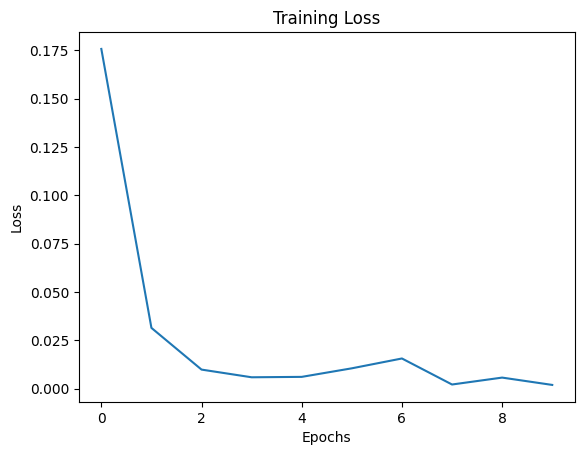

              precision    recall  f1-score   support

   AbdomenCT       1.00      1.00      1.00       313
   BreastMRI       1.00      1.00      1.00       287
         CXR       1.00      0.99      0.99       313
     ChestCT       0.99      1.00      1.00       296
        Hand       0.99      0.99      0.99       288
      HeadCT       1.00      1.00      1.00       303

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800

Test Accuracy: 0.9967


In [ ]:
# Training loss
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

all_preds = []
all_labels = []

for images, labels in test_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

# Generate classification report
report = classification_report(all_labels, all_preds, target_names=dataset.classes,  zero_division=0)
print(report)

# Calculate test accuracy
test_accuracy = (torch.tensor(all_preds) == torch.tensor(all_labels)).float().mean().item()
print(f'Test Accuracy: {test_accuracy:.4f}')